In [1]:
import os
import glob
import wave
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
from IPython.display import display
from sklearn import model_selection

pd.options.display.max_colwidth = 100

# File paths

In [2]:
b_com_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(b_com_dir, 'data/')
file_name = 'kogara/kogara_gsqueal1-2.wav'
file_path = data_dir + file_name

In [ ]:
data_dir = os.path.join(b_com_dir, 'crawling/')
file_name = ''


# Check wav data and melsp data

In [3]:
def load_wave_data(file_path):
    # sr: sampling rate
    x, fs = librosa.load(file_path, sr=44100)
    return x, fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    # dB
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft, n_mels=128)
    return melsp

def show_wave(x, fs):
    time = np.arange(0, len(x)) / fs
    plt.rcParams["figure.figsize"] = (15, 4)
    plt.plot(time, x)
    plt.xlabel("Time(s)")
    plt.ylabel("Sound Amplitude")
    plt.show()

def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs, x_axis='s', y_axis='frames')
    plt.colorbar()
    plt.show()

wave_size:(132300,)
melsp_size:(128, 1034)
sampling_rate:44100


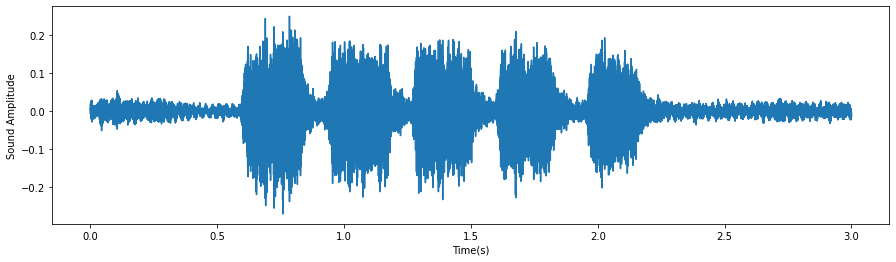

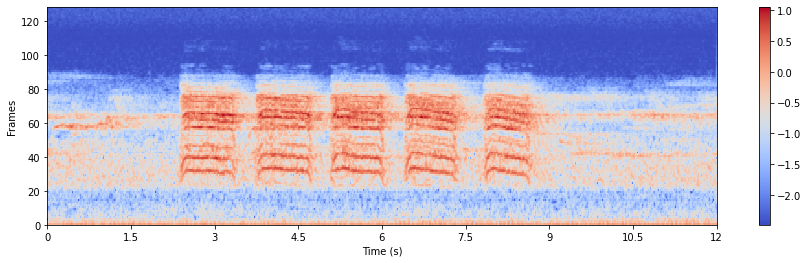

In [4]:
x, fs = load_wave_data(file_path)
melsp = calculate_melsp(x)
print("wave_size:{0}\nmelsp_size:{1}\nsampling_rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x, fs)
show_melsp(melsp, fs)
display(IPython.display.Audio(x, rate=fs))

# Dataframe

In [5]:
# set file path, file dir, file name, categories information to pandas dataframe
path = []
dirs = []
files = []
categories = []
bird_dirs = glob.glob(os.path.join(data_dir,'*'))
for bird_dir in bird_dirs:
    wav_paths = glob.glob(os.path.join(bird_dir,'*'))
    for wav_path in wav_paths:
        wav_file_name = wav_path.split('/')[-1]
        wav_file_dir = wav_path.replace(wav_file_name, '')
        path.append(wav_file_dir + wav_file_name)
        dirs.append(wav_file_dir)
        files.append(wav_file_name)
        categories.append(bird_dir.split('/')[-1])

In [6]:
meta_data = pd.DataFrame(list(zip(path, dirs, files, categories)), columns = ['paths', 'file_dirs', 'file_names', 'categories'])
# set unique id of categories
meta_data['target'] = meta_data['categories'].factorize()[0]

In [7]:
# add melsp and wav information
def func(row):
    _x, _fs = load_wave_data(row.paths)
    _melsp = calculate_melsp(_x)
    with wave.open(os.path.join(row.file_dirs, row.file_names), 'rb') as wr:
        _ch = wr.getnchannels()
        _width = wr.getsampwidth()
        _fr = wr.getframerate()
        _fn = wr.getnframes()
    return pd.Series([_x.shape, _fs, _melsp.shape, _ch, _width, _fr, _fn, _fn/_fr])

meta_data[['wav_shape', 'sample_rates', 'melsp_shape', 'wav_channels', 'wav_sample_size', 'wav_sampling_rate', 'wav_frame_rate', 'wav_time']] = meta_data.apply(func, axis=1)

In [8]:
meta_data.head(100)

,paths,file_dirs,file_names,categories,target,wav_shape,sample_rates,melsp_shape,wav_channels,wav_sample_size,wav_sampling_rate,wav_frame_rate,wav_time
0,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3-7.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3-7.wav,sijuukara,0,"(44100,)",44100,"(128, 345)",2,2,44100,44100,1.0
1,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal1-1.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal1-1.wav,sijuukara,0,"(176400,)",44100,"(128, 1379)",2,2,44100,176400,4.0
2,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3-2.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3-2.wav,sijuukara,0,"(83790,)",44100,"(128, 655)",2,2,44100,83790,1.9
3,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal2-1.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal2-1.wav,sijuukara,0,"(110250,)",44100,"(128, 862)",2,2,44100,110250,2.5
4,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal2-5.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal2-5.wav,sijuukara,0,"(132300,)",44100,"(128, 1034)",2,2,44100,132300,3.0
5,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal2-3.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal2-3.wav,sijuukara,0,"(74970,)",44100,"(128, 586)",2,2,44100,74970,1.7
6,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3-6.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3-6.wav,sijuukara,0,"(83790,)",44100,"(128, 655)",2,2,44100,83790,1.9
7,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3-5.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3-5.wav,sijuukara,0,"(88200,)",44100,"(128, 690)",2,2,44100,88200,2.0
8,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3-4.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3-4.wav,sijuukara,0,"(119070,)",44100,"(128, 931)",2,2,44100,119070,2.7
9,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3-1.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3-1.wav,sijuukara,0,"(123480,)",44100,"(128, 965)",2,2,44100,123480,2.8


# Augumentation

In [9]:
# add white noise
# randn:平均0、分散1 引数はサイズ
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [10]:
# shift sound in timeframe
# rollでいいのか検討
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [11]:
# stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    # Time-stretch an audio series by a fixed rate.
    x = librosa.effects.time_stretch(x, rate)
    if len(x) > input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(1, input_length - len(x))), "constant")

# Training dataset and test dataset

In [12]:
x = list(meta_data.loc[:,"paths"])
y = list(meta_data.loc[:,"target"])

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)

In [14]:
# check data length
print('x_train data length:\t{}\ny_train data length:\t{}\nx_test data length:\t{}\ny_test data length:\t{}'.format(len(x_train),
                                                                                                                    len(y_train),
                                                                                                                    len(x_test),
                                                                                                                    len(y_test)))

x_train data length:	28
y_train data length:	28
x_test data length:	10
y_test data length:	10


In [15]:
# check test data classes
a = np.zeros(2)
for c in y_test:
    a[c] += 1
print(a)

[5. 5.]


# Transform wav to mel-stft array

In [16]:
# this parameter decied input data size
# frequency: vertical axis
freq = 128
# time: horizontal axis
time = 1723

In [17]:
# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
    np_data = np.zeros(len(x)*freq*time).reshape(len(x), freq, time)
    np_targets = np.zeros(len(y))
    for i in range(len(y)):
        _x, _fs = load_wave_data(x[i])
        # modify input scale freq*time
        if len(_x) < freq*time:
            _x = np.pad(_x, (0, freq*time-len(_x)-1), "constant")
        if aug is not None:
            _x = aug(x=_x, rate=rates[i])
        _x = calculate_melsp(_x)
        np_data[i] = _x
        np_targets[i] = y[i]
    np.savez(filename, x=np_data, y=np_targets)

In [18]:
# save test dataset
if not os.path.exists("test.npz"):
    save_np_data("test.npz", x_test, y_test)

In [19]:
# save raw training dataset
if not os.path.exists("train_raw.npz"):
    save_np_data("train_raw.npz", x_train,  y_train)

In [20]:
# save training dataset with white noise
if not os.path.exists("train_wn.npz"):
    rates = np.random.randint(1,50,len(x_train))/10000
    save_np_data("train_wn.npz", x_train, y_train, aug=add_white_noise, rates=rates)

In [21]:
# save training dataset with sound shift
if not os.path.exists("train_ss.npz"):
    rates = np.random.choice(np.arange(2,6),len(y_train))
    save_np_data("train_ss.npz", x_train, y_train, aug=shift_sound, rates=rates)

In [22]:
# save training dataset with stretch
if not os.path.exists("train_st.npz"):
    rates = np.random.choice(np.arange(80,120),len(y_train))/100
    save_np_data("train_st.npz", x_train, y_train, aug=stretch_sound, rates=rates)

In [23]:
# save training dataset with combination of white noise and shift or stretch
if not os.path.exists("train_com.npz"):
    np_data = np.zeros(freq*time*len(x_train)).reshape(len(x_train), freq, time)
    np_targets = np.zeros(len(y_train))
    for i in range(len(y_train)):
        x, fs = load_wave_data(x_train[i])
        x = add_white_noise(x=x, rate=np.random.randint(1,50)/1000)
        if np.random.choice((True,False)):
            x = shift_sound(x=x, rate=np.random.choice(np.arange(2,6)))
        else:
            x = stretch_sound(x=x, rate=np.random.choice(np.arange(80,120))/100)
        if len(x) < freq*time:
            x = np.pad(x, (0, freq*time-len(x)-1), "constant")
        x = calculate_melsp(x)
        np_data[i] = x
        np_targets[i] = y_train[i]
    np.savez("train_com.npz", x=np_data, y=np_targets)

# Audio classification with deep learning

# Preparation for deep learning

In [44]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [45]:
# dataset files
train_files = ["train_raw.npz", 
               "train_ss.npz",
               "train_st.npz", 
               "train_wn.npz",
               "train_com.npz"]
test_file = "test.npz"

In [46]:
train_num = 28
test_num = 10

In [47]:
# define dataset placeholders
x_train = np.zeros(freq*time*train_num*len(train_files)).reshape(train_num*len(train_files), freq, time)
y_train = np.zeros(train_num*len(train_files))

In [48]:
# load dataset
for i in range(len(train_files)):
    data = np.load(train_files[i])
    x_train[i*train_num:(i+1)*train_num] = data["x"]
    y_train[i*train_num:(i+1)*train_num] = data["y"]

In [49]:
# load test dataset
test_data = np.load(test_file)
x_test = test_data["x"]
y_test = test_data["y"]

In [54]:
# redefine target data into one hot vector
# 出力側の形状を整えた
classes = 2
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

In [58]:
# reshape training dataset
# 入力側の形状を整えた
x_train = x_train.reshape(train_num*5, freq, time, 1)
x_test = x_test.reshape(test_num, freq, time, 1)

In [62]:
print("x train:{0}\ny train:{1}\nx test:{2}\ny test:{3}".format(x_train.shape,
                                                                y_train.shape, 
                                                                x_test.shape, 
                                                                y_test.shape))

x train:(140, 128, 1723, 1)
y train:(140, 2)
x test:(10, 128, 1723, 1)
y test:(10, 2)


# Define convolutional neural network

In [63]:
def cba(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [64]:
# define CNN
inputs = Input(shape=(x_train.shape[1:]))

x_1 = cba(inputs, filters=32, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=32, kernel_size=(8,1), strides=(2,1))
x_1 = cba(x_1, filters=64, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=64, kernel_size=(8,1), strides=(2,1))

x_2 = cba(inputs, filters=32, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=32, kernel_size=(16,1), strides=(2,1))
x_2 = cba(x_2, filters=64, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=64, kernel_size=(16,1), strides=(2,1))

x_3 = cba(inputs, filters=32, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=32, kernel_size=(32,1), strides=(2,1))
x_3 = cba(x_3, filters=64, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=64, kernel_size=(32,1), strides=(2,1))

x_4 = cba(inputs, filters=32, kernel_size=(1,64), strides=(1,2))
x_4 = cba(x_4, filters=32, kernel_size=(64,1), strides=(2,1))
x_4 = cba(x_4, filters=64, kernel_size=(1,64), strides=(1,2))
x_4 = cba(x_4, filters=64, kernel_size=(64,1), strides=(2,1))

x = Add()([x_1, x_2, x_3, x_4])

x = cba(x, filters=128, kernel_size=(1,16), strides=(1,2))
x = cba(x, filters=128, kernel_size=(16,1), strides=(2,1))

x = GlobalAveragePooling2D()(x)
x = Dense(classes)(x)
x = Activation("softmax")(x)

model = Model(inputs, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 1723,   0           []                               
                                1)]                                                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 128, 862, 32  288         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 128, 862, 32  544         ['input_2[0][0]']                
                                )                                                             

                                                                                                  
 batch_normalization_28 (BatchN  (None, 64, 431, 64)  256        ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_32 (BatchN  (None, 64, 431, 64)  256        ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_20 (Activation)     (None, 64, 431, 64)  0           ['batch_normalization_20[0][0]'] 
                                                                                                  
 activation_24 (Activation)     (None, 64, 431, 64)  0           ['batch_normalization_24[0][0]'] 
          

# Optimization and callbacks

In [84]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.00001, decay=1e-6, amsgrad=True)

# Let's train the model using Adam with amsgrad
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [85]:
# directory for model checkpoints
model_dir = "./models"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# early stopping and model checkpoint# early  
es_cb = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
chkpt = os.path.join(model_dir, 'esc50_.{epoch:02d}_{val_loss:.4f}_{val_acc:.4f}.hdf5')
cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# Train CNN model with between class dataset

In [86]:
# between class data generator
class MixupGenerator():
    def __init__(self, x_train, y_train, batch_size=16, alpha=0.2, shuffle=True):
        self.x_train = x_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.alpha = alpha
        self.shuffle = shuffle
        self.sample_num = len(x_train)

    def __call__(self):
        while True:
            indexes = self.__get_exploration_order()
            itr_num = int(len(indexes) // (self.batch_size * 2))

            for i in range(itr_num):
                batch_ids = indexes[i * self.batch_size * 2:(i + 1) * self.batch_size * 2]
                x, y = self.__data_generation(batch_ids)

                yield x, y

    def __get_exploration_order(self):
        indexes = np.arange(self.sample_num)

        if self.shuffle:
            np.random.shuffle(indexes)

        return indexes

    def __data_generation(self, batch_ids):
        _, h, w, c = self.x_train.shape
        _, class_num = self.y_train.shape
        x1 = self.x_train[batch_ids[:self.batch_size]]
        x2 = self.x_train[batch_ids[self.batch_size:]]
        y1 = self.y_train[batch_ids[:self.batch_size]]
        y2 = self.y_train[batch_ids[self.batch_size:]]
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)
        x_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        x = x1 * x_l + x2 * (1 - x_l)
        y = y1 * y_l + y2 * (1 - y_l)

        return x, y

In [91]:
# train model
batch_size = 10
epochs = 1000

training_generator = MixupGenerator(x_train, y_train)()
model.fit_generator(generator=training_generator,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, 
                    verbose=1,
                    shuffle=True,
                    callbacks=[es_cb, cp_cb])

Epoch 1/1000


/tmp/ipykernel_184565/1780721020.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=training_generator,


14/14 [==============================] - ETA: 0s - loss: 0.4456 - acc: 0.8170
Epoch 1: val_loss did not improve from 0.84877
14/14 [==============================] - 13s 921ms/step - loss: 0.4456 - acc: 0.8170 - val_loss: 0.9443 - val_acc: 0.5000
Epoch 2/1000
14/14 [==============================] - ETA: 0s - loss: 0.4210 - acc: 0.8750
Epoch 2: val_loss did not improve from 0.84877
14/14 [==============================] - 13s 935ms/step - loss: 0.4210 - acc: 0.8750 - val_loss: 0.9782 - val_acc: 0.5000
Epoch 3/1000
14/14 [==============================] - ETA: 0s - loss: 0.4243 - acc: 0.8393
Epoch 3: val_loss did not improve from 0.84877
14/14 [==============================] - 13s 928ms/step - loss: 0.4243 - acc: 0.8393 - val_loss: 0.9964 - val_acc: 0.5000
Epoch 4/1000
14/14 [==============================] - ETA: 0s - loss: 0.4126 - acc: 0.8929
Epoch 4: val_loss did not improve from 0.84877
14/14 [==============================] - 13s 933ms/step - loss: 0.4126 - acc: 0.8929 - val_loss

14/14 [==============================] - 13s 944ms/step - loss: 0.2428 - acc: 0.9330 - val_loss: 0.2157 - val_acc: 0.9000
Epoch 31/1000
14/14 [==============================] - ETA: 0s - loss: 0.2216 - acc: 0.9643
Epoch 31: val_loss did not improve from 0.12000
14/14 [==============================] - 13s 939ms/step - loss: 0.2216 - acc: 0.9643 - val_loss: 0.1784 - val_acc: 0.9000
Epoch 32/1000
14/14 [==============================] - ETA: 0s - loss: 0.2395 - acc: 0.9330
Epoch 32: val_loss improved from 0.12000 to 0.06216, saving model to ./models/esc50_.32_0.0622_1.0000.hdf5
14/14 [==============================] - 13s 949ms/step - loss: 0.2395 - acc: 0.9330 - val_loss: 0.0622 - val_acc: 1.0000
Epoch 33/1000
14/14 [==============================] - ETA: 0s - loss: 0.1984 - acc: 0.9598
Epoch 33: val_loss did not improve from 0.06216
14/14 [==============================] - 13s 939ms/step - loss: 0.1984 - acc: 0.9598 - val_loss: 0.0908 - val_acc: 1.0000
Epoch 34/1000
14/14 [============

14/14 [==============================] - 13s 942ms/step - loss: 0.2556 - acc: 0.9330 - val_loss: 0.0430 - val_acc: 1.0000
Epoch 61/1000
14/14 [==============================] - ETA: 0s - loss: 0.1933 - acc: 0.9688
Epoch 61: val_loss did not improve from 0.02378
14/14 [==============================] - 13s 940ms/step - loss: 0.1933 - acc: 0.9688 - val_loss: 0.0289 - val_acc: 1.0000
Epoch 62/1000
14/14 [==============================] - ETA: 0s - loss: 0.2202 - acc: 0.9643
Epoch 62: val_loss did not improve from 0.02378
14/14 [==============================] - 13s 938ms/step - loss: 0.2202 - acc: 0.9643 - val_loss: 0.0358 - val_acc: 1.0000
Epoch 63/1000
14/14 [==============================] - ETA: 0s - loss: 0.2107 - acc: 0.9643
Epoch 63: val_loss did not improve from 0.02378
14/14 [==============================] - 13s 945ms/step - loss: 0.2107 - acc: 0.9643 - val_loss: 0.0257 - val_acc: 1.0000
Epoch 64/1000
14/14 [==============================] - ETA: 0s - loss: 0.1914 - acc: 0.9688


# Evaluate model

In [88]:
model = load_model("./models/esc50_.01_0.8488_0.5000.hdf5")

In [89]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

1/1 [==============================] - 0s 363ms/step - loss: 0.8488 - acc: 0.5000
[0.8487707376480103, 0.5]
